In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta ##calculating time differneces or other manipulations between 2 or more datetime values
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
register_matplotlib_converters()
from time import time
import matplotlib.pyplot as plt

In [2]:
def parser(s):
    return datetime.datetime.strptime(s,'%Y-%m-%d')

In [3]:
df=pd.read_csv('C:\ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10424\950117946.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.read_csv('C:\ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)


In [4]:
df.rename('Production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: Production, Length: 577, dtype: float64

In [5]:
#Taking the frequency of the data wrt time
freq=df.asfreq(pd.infer_freq(df.index))

In [41]:
#Taking data from 2011 onwards
start_date=pd.to_datetime('2010-01-01')
n_df=df[start_date:]

In [42]:
##Sample code for asfreq and infer_freq
import pandas as pd

# Create a sample DataFrame with irregular time index
date_rng = pd.to_datetime(['2022-01-15', '2022-02-10', '2022-03-05'])
df1 = pd.DataFrame({'values': [1, 2, 3]}, index=date_rng)

# Infer the frequency (it might return 'MS' if monthly start is inferred)
inferred_freq = pd.infer_freq(df1.index)

# Convert to the inferred frequency
freq1 = df1.asfreq(inferred_freq)

# Display the result
print(freq1)


            values
2022-01-15     1.0
2022-01-16     NaN
2022-01-17     NaN
2022-01-18     NaN
2022-01-19     NaN
2022-01-20     NaN
2022-01-21     NaN
2022-01-22     NaN
2022-01-23     NaN
2022-01-24     NaN
2022-01-25     NaN
2022-01-26     NaN
2022-01-27     NaN
2022-01-28     NaN
2022-01-29     NaN
2022-01-30     NaN
2022-01-31     NaN
2022-02-01     NaN
2022-02-02     NaN
2022-02-03     NaN
2022-02-04     NaN
2022-02-05     NaN
2022-02-06     NaN
2022-02-07     NaN
2022-02-08     NaN
2022-02-09     NaN
2022-02-10     2.0
2022-02-11     NaN
2022-02-12     NaN
2022-02-13     NaN
2022-02-14     NaN
2022-02-15     NaN
2022-02-16     NaN
2022-02-17     NaN
2022-02-18     NaN
2022-02-19     NaN
2022-02-20     NaN
2022-02-21     NaN
2022-02-22     NaN
2022-02-23     NaN
2022-02-24     NaN
2022-02-25     NaN
2022-02-26     NaN
2022-02-27     NaN
2022-02-28     NaN
2022-03-01     NaN
2022-03-02     NaN
2022-03-03     NaN
2022-03-04     NaN
2022-03-05     3.0


In [43]:
n_df.head()

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
Name: Production, dtype: float64

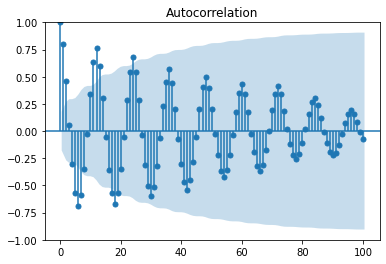

In [44]:
acf=plot_acf(n_df,lags=100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


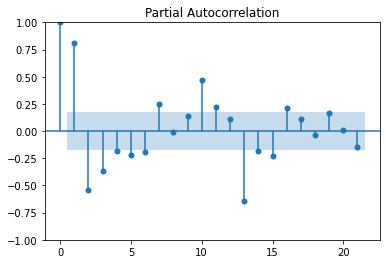

In [45]:
pacf=plot_pacf(n_df)
##Check the spikes in the graph

In [46]:
##Generating Training and test set
train_end=datetime.datetime(2018,12,1)
test_end=datetime.datetime(2019,12,1)
train_data=n_df[:train_end]
test_data=n_df[train_end+timedelta(days=1):test_end]

In [47]:
print(test_data)

DATE
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
Name: Production, dtype: float64


In [48]:
print(train_data)

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
Name: Production, Length: 108, dtype: float64


In [49]:
model=AutoReg(train_data,3)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
#fitting the model
start=time()
model_fit=model.fit()
end=time()
print('Fitting Time',end-start)

Fitting Time 0.0030090808868408203


In [51]:
print(model_fit.summary())
#Check the P>|z| column, ideally it should be less than 0.05
#Checking the table we see that lag 2 is not important

                            AutoReg Model Results                             
Dep. Variable:             Production   No. Observations:                  108
Model:                     AutoReg(3)   Log Likelihood                -361.899
Method:               Conditional MLE   S.D. of innovations              7.597
Date:                Sat, 02 Mar 2024   AIC                            733.798
Time:                        00:32:26   BIC                            747.068
Sample:                    04-01-2010   HQIC                           739.175
                         - 12-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.7865      5.596      7.468      0.000      30.819      52.754
Production.L1     1.0277      0.089     11.527      0.000       0.853       1.202
Production.L2    -0.0323      0.134     

In [52]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [53]:
#get the predictions and residuals
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions #errors

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


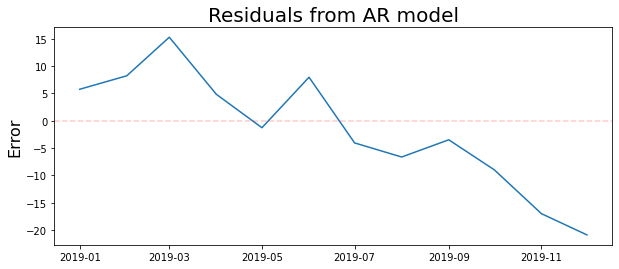

In [54]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)


Here in the graph the residuals are more in around 0 but in the end they become negative which is less than favourable

Text(0, 0.5, 'Productions')

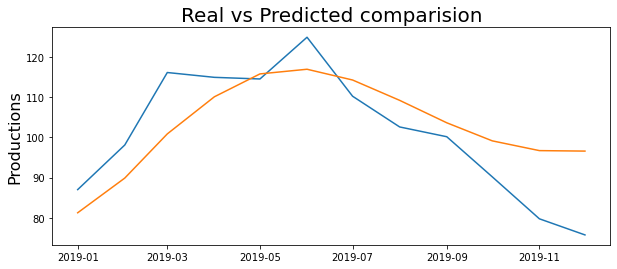

In [55]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.title('Real vs Predicted comparision',fontsize=20)
plt.ylabel('Productions',fontsize=16)

In [56]:
##Making the model incorporating 21 lags 
model1=AutoReg(train_data,13)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
#fitting the model
start=time()
model_fit1=model1.fit()
end=time()
print('Fitting Time',end-start)

Fitting Time 0.00299835205078125


In [59]:
print(model_fit1.summary())
#Check the P>|z| column, ideally it should be less than 0.05

                            AutoReg Model Results                             
Dep. Variable:             Production   No. Observations:                  108
Model:                    AutoReg(13)   Log Likelihood                -259.655
Method:               Conditional MLE   S.D. of innovations              3.722
Date:                Sat, 02 Mar 2024   AIC                            549.311
Time:                        00:33:22   BIC                            587.619
Sample:                    02-01-2011   HQIC                           564.790
                         - 12-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.2254     10.456      3.464      0.001      15.731      56.719
Production.L1      0.8078      0.079     10.212      0.000       0.653       0.963
Production.L2      0.0590      0.097

In [60]:
predictions=model_fit1.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions #errors

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


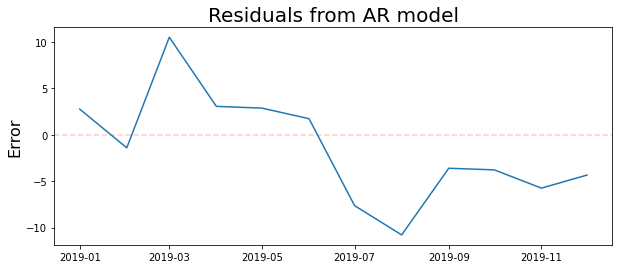

In [61]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)

Text(0, 0.5, 'Productions')

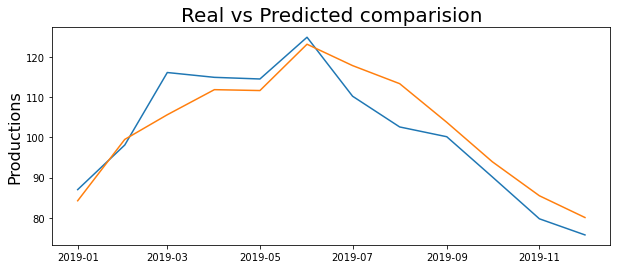

In [62]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.title('Real vs Predicted comparision',fontsize=20)
plt.ylabel('Productions',fontsize=16)

In [63]:
print("MAE",round(np.mean(abs(residuals/test_data)),4))

MAE 0.0487


Including more lags will just further complicate the model, the splitting of data will only get us so far.
In AR3 model, we have seen that the is not that great it is because the it will do well for the first n months, in which it has been trained on, but will fall short as the months goes by.


# Do a rolling forecast origin

Idea: Predict one month in advance each time

Train on months 1,2,....k-3  ->  predict month k-2


Train on months 1,2,....k-3,k-2 -> predict on month k-1


Train on months 1,2,....k-3,k-2,k-1 predict on month k

Average all predictions

In [64]:
print(test_data.index)

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)


In [73]:
print(train_data.index[-1])

2019-11-01 00:00:00


In [66]:
print(n_df.index)

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=121, freq=None)


In [67]:
#create the model

prediction_rolling = pd.Series(dtype='float64')
for end_date in test_data.index:
    train_data=n_df[:end_date-timedelta(days=1)]  ##eg train_data=n_df[:2018-12-31]
    start_date = train_data.index[-1] ##eg start_date=2018-11-31
    model=AutoReg(train_data,3)
    model_fit=model.fit()
    pred = model_fit.predict(start=start_date, end=end_date) ##will predict month by month till 2019-12-01
    prediction_rolling.loc[end_date]=pred.loc[end_date]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is se

In [68]:
residuals_rollings=test_data-prediction_rolling

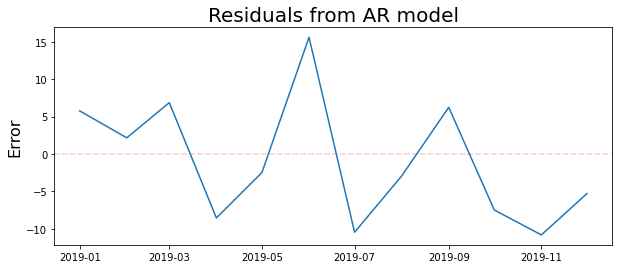

In [69]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rollings)
plt.title('Residuals from AR model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)

Here in this graph there seems no seasnonality which is a pretty good sign of a strong AR model

Text(0, 0.5, 'Productions')

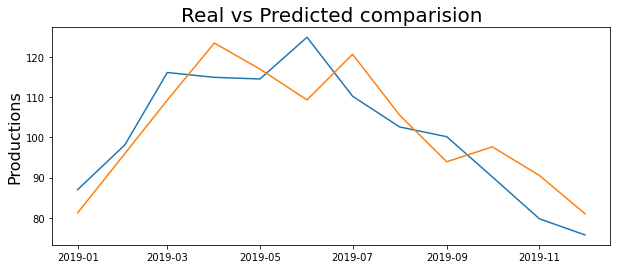

In [70]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(prediction_rolling)
plt.title('Real vs Predicted comparision',fontsize=20)
plt.ylabel('Productions',fontsize=16)